# LANL Earthquake Prediction: Research Prediction Challenge

### This project is aimed at predicting the timing of labratory earthquakes based on seismic signals

-------------------------------------------

## TO DO:

- Find other time series machine learning models to test on the data
- Come up with data treatment methods, so that ML models can more easily make predictions
- Write a training function that loads the data chunk by chunk in order to fit within ram.
- See if you can find any other earthquake data sets that could be used for extra training
- Come up with grid search function to tune chosen models, and pick the best one


### Loading Data:
- None

### Data Analysis:
- Get data statistical metrics
- Test-Train-Split
- Split into segments to the failure of the model

### Model Selection:

    Recurrent Neural Network:
        - build functional model
    
    Neural Differential Equation:
        - find a way to import into conda
        - build funtional model
        
    Gradient Boosting:
        - What is this, effective???
    




## Importing Dependencies :
---

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as ks
print("Successfully Imported Dependencies")

Using TensorFlow backend.


Successfully Imported Dependencies


## Loading Data:
---

The training csv file is approximatley 9.5 gigabytes so only fractions of the data file will be loaded at any given time.

In [5]:
%%time
path = "/Users/Greg/Desktop/LANL-Data/LANL-Training-Data/Training-Data015.csv"
train_df = pd.read_csv(path, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

Wall time: 6.36 s


In [6]:
def load_testing_data():
    path = "/Users/gregeales/LANL-Test-Data"
    testing_segments = os.listdir(path)
    return None

## Data Analysis:
---

Training Data includes **acoustic_data** which is the acoustic strength at the time of measurement. The 2nd column is **time_to_failure** which is the time until the next labratory earthquake.

In [7]:
#print(train_df.head())
print(train_df.head())

   acoustic_data  time_to_failure
0              7           9.4595
1              7           9.4595
2              4           9.4595
3              3           9.4595
4              3           9.4595


Data Successfully Plotted


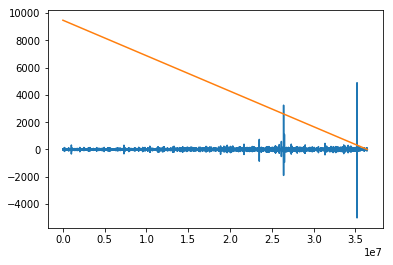

In [8]:
plt.plot(train_df["acoustic_data"].values[::1])
plt.plot(1000*train_df["time_to_failure"].values[::1])
print("Data Successfully Plotted")

Regular intervals of decrease, large spike usually happend before earthquakes indicated by the time reset.

## Model Selection:
---

### Recurrent Neural Networks:

In [71]:
X = Data["acoustic_data"].values.reshape([len(Data["acoustic_data"].values), 1, 1])[::100]
print(X.shape)
Y = Data["time_to_failure"].values.reshape([len(Data["time_to_failure"].values), 1])[::100]
print(Y.shape)

(100000, 1, 1)
(100000, 1)


In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, RNN

LSTM_Model = Sequential()

LSTM_Model.add(LSTM(15, input_dim=1))
LSTM_Model.add(Dense(15, input_dim=15, activation="relu"))
LSTM_Model.add(Dense(5, input_dim=15, activation="relu"))
LSTM_Model.add(Dense(1, input_dim=5, activation="relu"))

LSTM_Model.compile(optimizer="adam", loss='mean_squared_error')

LSTM_Model.fit(X, Y)

/Users/gregeales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/Users/gregeales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(15, input_shape=(None, 1))`
  


Epoch 1/1
100000/100000 [==============================] - 20s 199us/step - loss: 0.0518


In [17]:
X = Data["acoustic_data"].values.reshape([len(Data["acoustic_data"].values), 1, 1])[100000:200000]
Y = Data["time_to_failure"].values.reshape([len(Data["time_to_failure"].values), 1])[100000:200000]
print(LSTM_Model.evaluate(X, Y))

100000/100000 [==============================] - 4s 41us/step
0.0008872417857451365


### Neural Ordinary Differential Equations:

NameError: name 'modules' is not defined

### Gradient Boosting:

## Model Optimization
---

## Model Evaluation:
---